# Исследование для интернет-магазина компьютерных игр
---
<a id = "Введение"></a>

### *Описание проекта*

Необходимо провести анализ исторических данных о продажах игр полученных из открытых источников и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Мы планируем кампанию на 2017-й год. Данные собраны за период до 2016 года включительно.

### *Описание данных*

Имеющиеся данные:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### *План выполнения проекта:*
***

1. [Изучение общей информации о данных;](#Step1)
2. [Подготовка данных для анализа;](#Step2)
3. [Исследовательнский анализ данных;](#Step3)
4. [Составление портрета пользователей для каждого региона;](#Step4)
5. [Проверка гипотез;](#Step5)
6. [Общий вывод по проекту.](#Step6)

In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

### Шаг 1. Изучение общей информации о данных
---

<a id = "Step1"></a>
[Введение](#Введение)  [2](#Step2) [3](#Step3) [4](#Step4) [5](#Step5) [6](#Step6)

In [24]:
games = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\games.csv')

In [25]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5107,Fushigi no Dungeon: Furai no Shiren 2 - Oni Sh...,N64,2000.0,Role-Playing,0.00,0.00,0.32,0.05,NaN,NaN,NaN
3584,WWE Raw 2,XB,2003.0,Fighting,0.43,0.11,0.00,0.02,68.0,7.3,T
2754,Mortal Kombat: Unchained,PSP,2006.0,Fighting,0.67,0.01,0.00,0.06,70.0,8.8,M
435,Animal Crossing,GC,2001.0,Simulation,1.92,0.16,0.99,0.09,87.0,8.9,E
13607,Tennis no Oji-Sama: DokiDoki Survival - Sanrok...,PS2,2006.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
10138,Open Season,X360,2006.0,Platform,0.10,0.00,0.00,0.01,59.0,7.3,E10+
7775,Enchanted Arms,X360,2006.0,Role-Playing,0.16,0.02,0.00,0.02,69.0,6.9,T
5198,NFL GameDay 2001,PS2,2000.0,Sports,0.18,0.14,0.00,0.05,51.0,tbd,E
5238,Arctic Thunder,PS2,2001.0,Racing,0.17,0.14,0.00,0.05,45.0,5.3,T
15150,Fishdom 2 Deluxe,PC,2010.0,Puzzle,0.00,0.02,0.00,0.00,NaN,NaN,NaN


In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [27]:
print('Всего игр:', len(games['Name'].unique()))

Всего игр: 11560


In [28]:
print('Всего', len(games['Genre'].unique()), 'жанров')

Всего 13 жанров


In [29]:
print('Собранные игры в датасете c', "{:.0f}".format(games['Year_of_Release'].min()), 'по', 
      "{:.0f}".format(games['Year_of_Release'].max()), 'годы')

Собранные игры в датасете c 1980 по 2016 годы


---
В таблице присутствуют 16715 строк и 11 столбцов. Найдены пропуски, преимущественно они содержатся в столбцах для оценок и рейтинга. Всего в датасете представлены 11560 игр из 13 различных жанров. Данные собраны за 36 лет с 1980 г. по 2016 г.

### Шаг 2. Подготовка данных для анализа
---
<a id = "Step2"></a>

[Введение](#Введение) [1](#Step1)  [3](#Step3) [4](#Step4) [5](#Step5) [6](#Step6)

Приведем к нижнему регистру названия столбцов:

In [30]:
games.columns = games.columns.str.lower()

#### Обработка пропусков
---

In [31]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [32]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У двух игр пропущено название. Так как восстановить эту информацию невозможно, удалим данные строки.

In [33]:
games = games.drop([659, 14244]).reset_index(drop = True)

В столбце с годом выпуска игры найдено 269 пропущенных значений. Попробуем заполнить часть этих пропусков с помощью столбца "Name". В названии многих игр фигурирует определенный год. 

Для начала создадим вспомогательную таблицу, в которой будет содержаться название игры и год выпуска. Она поможет заполнить пропуски в оригинальной таблице для игр с совпадающими названиями. 

In [34]:
all_games = games.groupby('name')['year_of_release'].median().fillna(0)#.reset_index()
#all_games

In [35]:
# Функция № 1 для заполнения пустых значений по вспомогательной таблице:
def find_year(row):
    name = row['name']
    year = row['year_of_release']
    
    if year == 0:
        return all_games[name]
    else:
        return year

В названии многих игр фигурирует год выпуска. Напишем функицю,которая выделяет год и подставляет вместа пустого значения.

In [36]:
# Функция № 2
from pymystem3 import Mystem
m = Mystem()

def find_year1(row):
    name = row['name']
    year = row['year_of_release']
    
    if year == 0:
        lemma = m.lemmatize(name)
        y = [int(i) for i in lemma if i.isdigit()]
        if len(y) > 0:
            if max(y) // 1000 >= 1:
                return max(y)
            else:
                return 0
        else:
            return 0
    else:
        return year
    

In [37]:
games['year_of_release'] = games['year_of_release'].fillna(0)

In [38]:
games['year_of_release'] = games.apply(find_year, axis = 1)

In [39]:
len(games[games['year_of_release'] == 0])

146

После преобразований осталось 139 пустых значений. От этих данных можно избавиться, так как их мало. Они не повлияют на результаты исследования. 

In [40]:
games = games[games['year_of_release'] != 0]

In [41]:
games.shape

(16567, 11)

Приведем столбец с годом выпуска игры в целочисленный формат.

In [42]:
games['year_of_release'] = games['year_of_release'].astype('int')

___
В столбцах с оценками критиков, оценками пользователей и рейтингом от ESRB заполнять пропуски не будем. Раз эти значения пропущены, скорее всего по тем или иным играм оценка не проводилась. Может быть причина в платформе, для которой игра выпущена. Из-за низкого количества оценок составить рейтинг было невозможно. 

In [43]:
games[games['user_score']== 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
725,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
820,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
880,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1046,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1047,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [44]:
games[games['user_score']== 'tbd'].shape

(2394, 11)

В столбце user_score довольно часто встречается ***аббревиатура "tbd"***. Полагаю, что её можно расшифровать как to be decided / to be determined. Фактически это равносильно пустому значению в таблице. 

---
В столбце "Оценка пользователей" данные представлены в виде текста. Изменим на числовой тип, попутно заменим значения 'tbd' на пустые. 

In [45]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [46]:
games.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [47]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Шаг 3. Исследовательский анализ данных
---
<a id = "Step3"></a>

[Введение](#Введение) [1](#Step1) [2](#Step2)  [4](#Step4) [5](#Step5) [6](#Step6)

**Рассмотрим, сколько игр выпускалось в разные годы.**

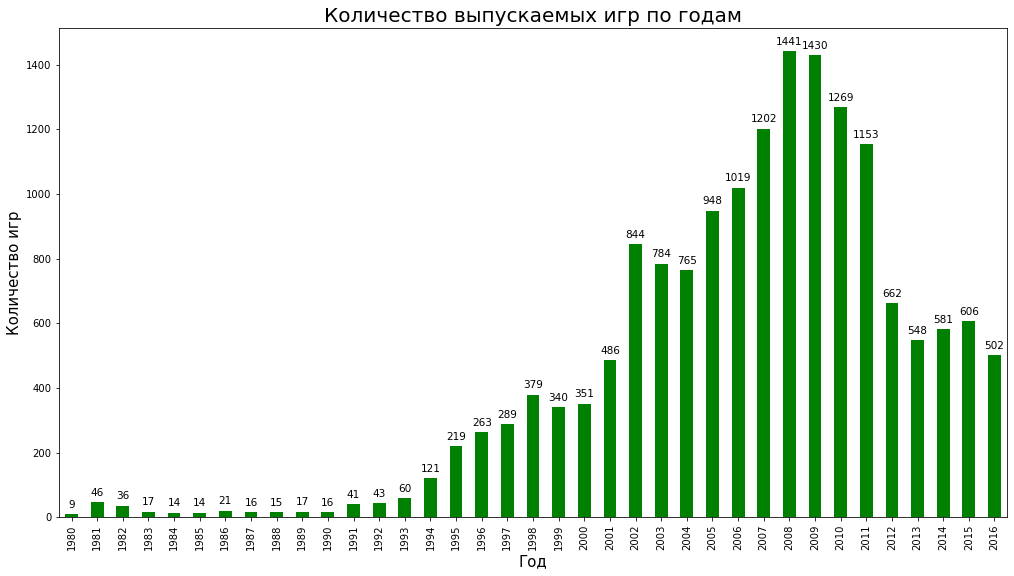

In [48]:
dynamic = games.groupby('year_of_release')['name'].count()
dynamic.plot(kind = 'bar', figsize = (17, 9), color = 'green', width=.5)
plt.ylabel("Количество игр", fontsize = 15)
plt.xlabel("Год", fontsize = 15)
plt.title('Количество выпускаемых игр по годам', fontsize=20)
for i, count in enumerate(dynamic):
    plt.text(i, count+20, count, horizontalalignment='center', fontsize = 10.5)

Пик пришелся на 2008 год. Тогда появилась 1441 игра для различных платформ. Последующие 8 лет количество новых игр  снижалось. Самое большое падение произошло в 2012 году - на 42.6% по сравнению с предыдущим годом. Для нашей работы не все данные будут важны, потому что  ситуация на рынке компьютерных игр изменяется постоянно: меняются технологии, появляются и исчезают игровые платформы. 

---
**Рассмотрим как менялись продажи по платформам**

In [49]:
platform_sales = games.pivot_table(index = 'platform', 
                  values  = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
print("------ Top 10 самых успешных игровых платформ ------ ")
platform_sales.head(10)

------ Top 10 самых успешных игровых платформ ------ 


,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Text(0.5, 1.0, 'Совокупные продажи по платформам с 1980 по 2016 гг')

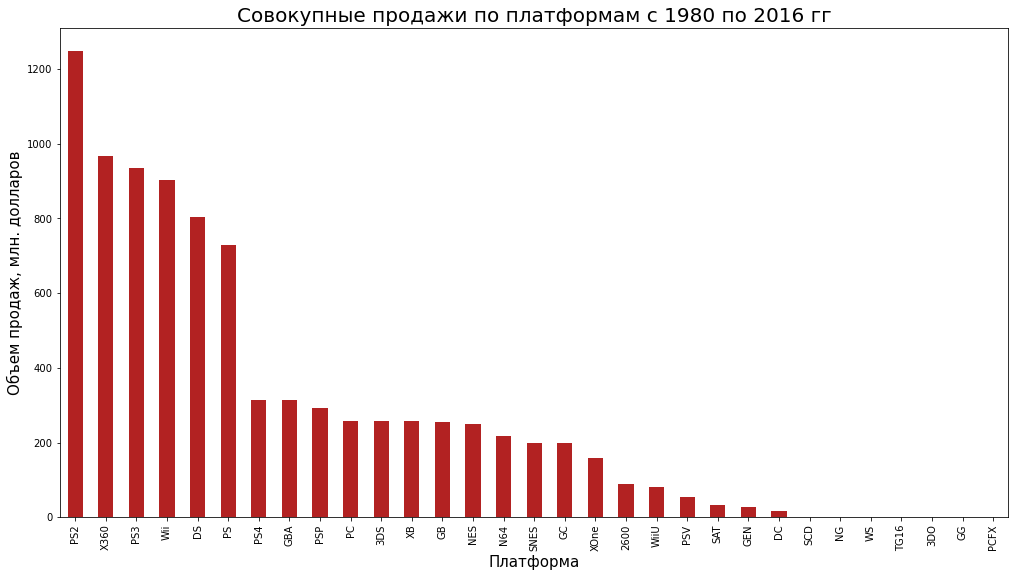

In [50]:
platform_sales.plot(kind = 'bar', figsize = (17, 9), color = 'firebrick', width=.5, legend = False)
plt.ylabel("Объем продаж, млн. долларов", fontsize = 15)
plt.xlabel("Платформа", fontsize = 15)
plt.title('Совокупные продажи по платформам с 1980 по 2016 гг', fontsize=20)

---
В топ 10 самых коммерчески успешных платформ вошли следующие: **PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, PC**. Построим по ним распределение продаж по годам.

In [51]:
top_10 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC']
platform_10 = games.query('platform in @top_10')

In [52]:
sales_pivot = platform_10.pivot_table(index = 'year_of_release', columns = 'platform', 
                                values  = 'total_sales', aggfunc = 'sum')

Text(0.5, 0, 'Годы')

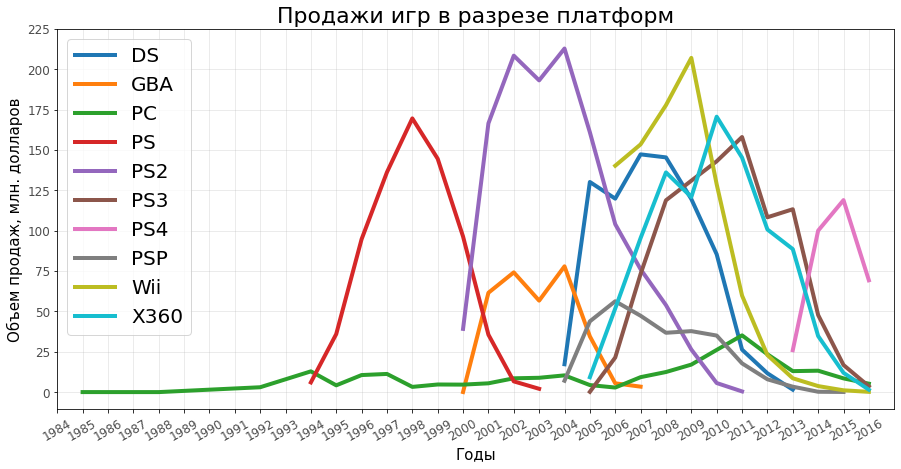

In [53]:
sales_pivot.plot(kind='line', style = '-', figsize = (15,7), xlim = (1984, 2017), lw=4)
ytick_location = range(0,250,25)
plt.yticks(fontsize=12, alpha=.7, ticks=ytick_location)
xtick_location = range(1984,2017,1)
plt.xticks(fontsize=12, alpha=.7, ticks=xtick_location, rotation=30)
plt.title("Продажи игр в разрезе платформ", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left', prop={'size': 20})
plt.ylabel("Объем продаж, млн. долларов", fontsize = 15)
plt.xlabel("Годы", fontsize = 15)

Для абсолютного большинства платформ характерны фазы "взлета" и "падения". Достигнув пика на волне популярности, обусловленного скорее всего выходом какой-либо игры, продажи не задерживаются на высоком уровне, а неуклонно идут вниз. Только игры на персональный компьютер показывают стабильный тренд на протяжении всего срока наблюдений. 

In [54]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX']
life = []
for p in platforms:
    q = games[games['platform'] == p]['year_of_release'].max() - games[games['platform'] == p]['year_of_release'].min()
    life.append(q)

#life_span = pd.DataFrame(data=[platforms,life], columns = [['platform','years']])
life_span = pd.Series(data = life, index = platforms)
life_span.median()

8.0

**В среднем игровые платформы живут 8 лет**.
___

Таким образом за ***актуальный период***  для построения прогноза на 2017 год можно взять даные за последние 8 лет. Сделаем соответствующий срез. 


In [55]:
games_actual = games[games['year_of_release'] >= 2008].reset_index(drop=True)

In [56]:
sales_act_pivot = games_actual.pivot_table(index = 'year_of_release', columns = 'platform', 
                                values  = 'total_sales', aggfunc = 'sum')

Text(0.5, 0, 'Годы')

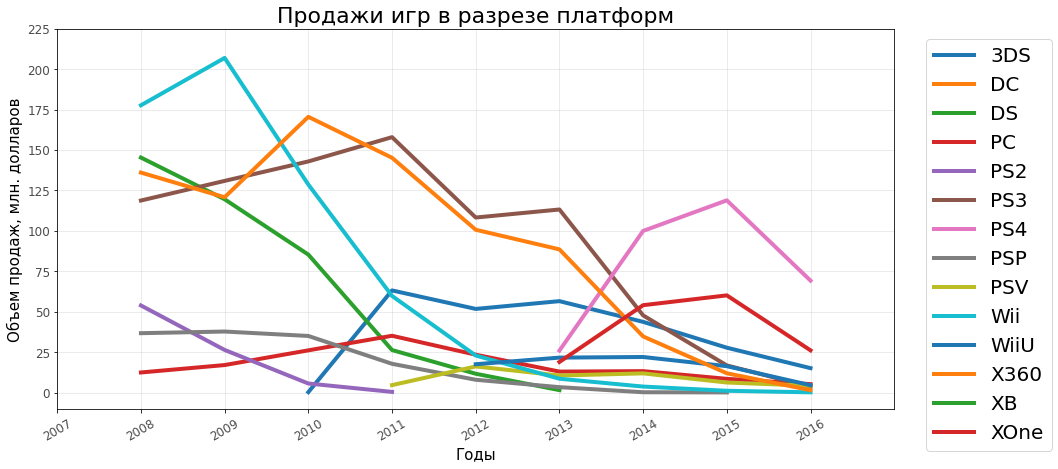

In [57]:
sales_act_pivot.plot(kind='line', style = '-', figsize = (15,7), xlim=(2007,2017), lw=4)
ytick_location = range(0,250,25)
plt.yticks(fontsize=12, alpha=.7, ticks=ytick_location)
xtick_location = range(2007,2017,1)
plt.xticks(fontsize=12, alpha=.7, ticks=xtick_location, rotation=30)
plt.title("Продажи игр в разрезе платформ", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='best', prop={'size': 20}, bbox_to_anchor=(1.2, 1))
plt.ylabel("Объем продаж, млн. долларов", fontsize = 15)
plt.xlabel("Годы", fontsize = 15)

Необходимо исключить платформы, на которых уже в 2016 году не выпускались игры.

In [58]:
supported_platforms = pd.DataFrame(games_actual.groupby('platform')['year_of_release'].max())
supported_platforms = supported_platforms.query('year_of_release == 2016')
supported_platforms.index

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

In [59]:
# Обновим нашу актуальную таблицу, исключив платформы, на которые в 2016 году игр не выпускалось.
games_actual_new = games_actual.query("platform in @supported_platforms.index").reset_index(drop=True)

In [60]:
games_actual_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
3,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
4,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
5677,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5678,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5679,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [61]:
sales_act_pivot_new = games_actual_new.pivot_table(index = 'year_of_release', columns = 'platform', 
                                values  = 'total_sales', aggfunc = 'sum')

Text(0.5, 0, 'Годы')

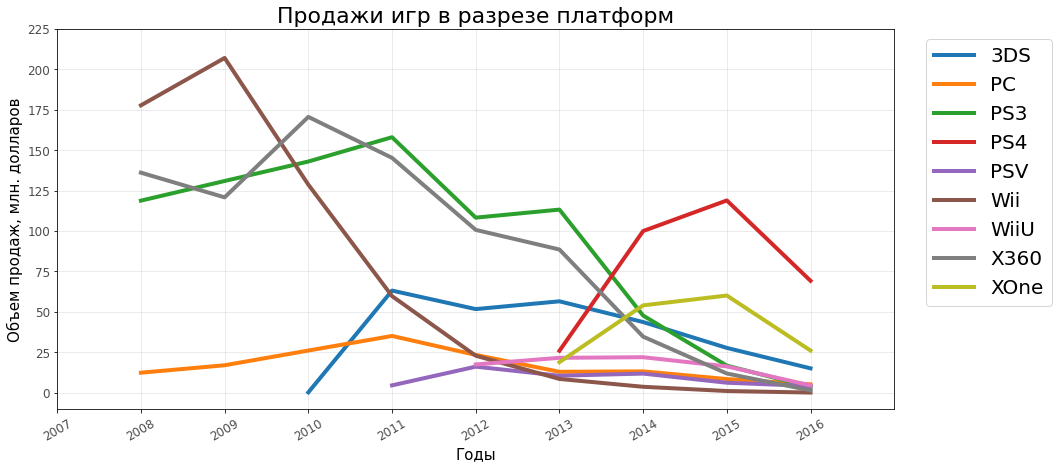

In [62]:
sales_act_pivot_new.plot(kind='line', style = '-', figsize = (15,7), xlim=(2007,2017), lw=4)

ytick_location = range(0,250,25)
plt.yticks(fontsize=12, alpha=.7, ticks=ytick_location)

xtick_location = range(2007,2017,1)
plt.xticks(fontsize=12, alpha=.7, ticks=xtick_location, rotation=30)

plt.title("Продажи игр в разрезе платформ", fontsize=22)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='best', prop={'size': 20}, bbox_to_anchor=(1.2, 1))

plt.ylabel("Объем продаж, млн. долларов", fontsize = 15)
plt.xlabel("Годы", fontsize = 15)

Таким образом, у нас остолось 9 платформ. Посмотрим на продажи игр для этих платформы: 

In [63]:
df_pivot1 = games_actual_new.pivot_table(index = 'platform', 
                             columns = 'year_of_release', 
                            values  = 'total_sales', 
                             aggfunc = 'sum').reset_index().sort_values(by = 2016,
                                                         ascending = False)

In [64]:
df_pivot1

year_of_release,platform,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,PS4,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
8,XOne,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15
0,3DS,NaN,NaN,0.30,63.20,51.76,56.57,43.76,27.78,15.14
1,PC,12.46,17.05,26.15,35.16,23.45,13.01,13.28,8.52,5.25
6,WiiU,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60
4,PSV,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
2,PS3,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
7,X360,136.07,120.82,170.55,145.23,100.72,88.58,34.74,11.96,1.52
5,Wii,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18


Text(0.5, 0, 'Годы')

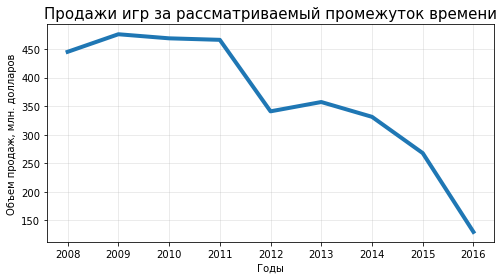

In [65]:
games_actual_new.groupby('year_of_release')['total_sales'].sum().plot(kind='line', 
                                                                      style = '-', 
                                                                      figsize = (8,4),
                                                                     grid = True, lw = 4)
plt.title("Продажи игр за рассматриваемый промежуток времени", fontsize=15)
plt.grid(axis='both', alpha=.3)
plt.ylabel("Объем продаж, млн. долларов", fontsize = 10)
plt.xlabel("Годы", fontsize = 10)

---
В 2015-2016 годах по продажам лидируют 5 платформ: Sony PlayStation 4, Xbox One, Nintendo 3DS, PC, WiiU 
На протяжении всего рассматриваемого периода совокупные продажи игр снижаются. В разрезе платформ наблюдается точно такая же тенденция. Даже новые PS4 и XOne, после анонса в 2013 году показывали рост только два года. Судя по всему, рынок компьютерных игр переживает не самые лучшие времена. 

**Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.**

Text(0.5, 1.0, 'Продажи игр')

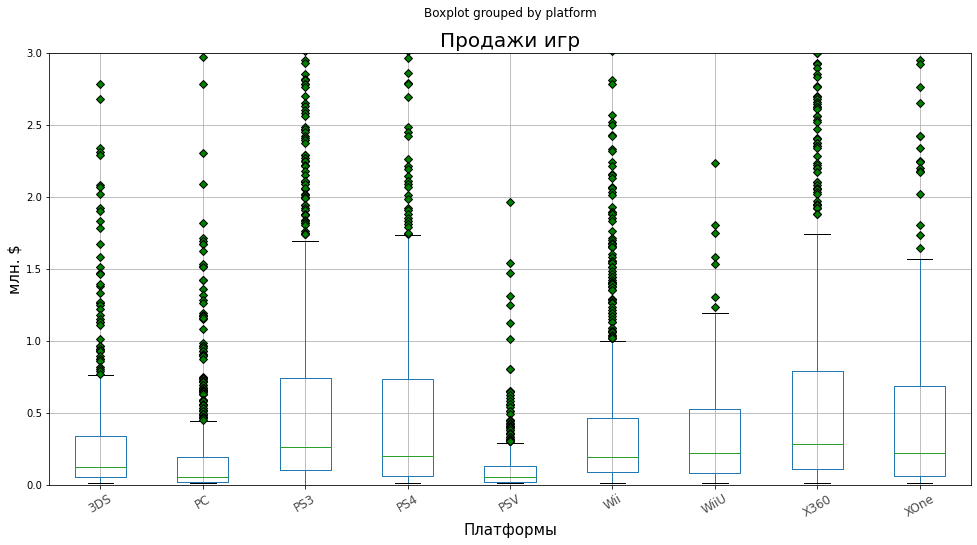

In [66]:
green_diamond = dict(markerfacecolor='g', marker='D')
games_actual_new.boxplot('total_sales', 
                         by = ['platform'], 
                         figsize = (16,8),
                        flierprops=green_diamond)

plt.ylim(0,3)
plt.ylabel("млн. $", fontsize = 15)
plt.xlabel("Платформы", fontsize = 15)
plt.xticks(fontsize=12, alpha=.7, rotation=30)
plt.title("Продажи игр", fontsize=20)


---
Самый большой разброс продаж наблюдается для игр на консоли PlaуStation (PS3, PS4), XBox (XOne, X360) и Nintendo  (Wii, WiiU) старых и новых версий. Разница между медианами продаж для этих платформ отличается не сильно. 

---
**Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Топ 5 платформ сформируем по результатам продаж за 2015-2016 гг. 


In [67]:
top_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

--------------- Корреляция и диаграмма рассеяния для платформы PS4 ---------------


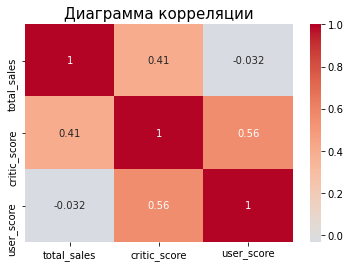

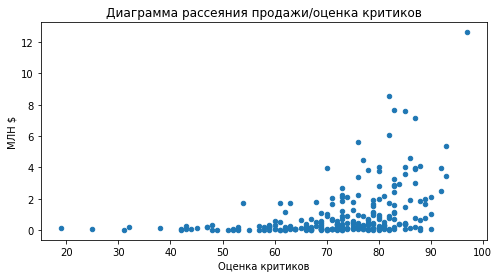

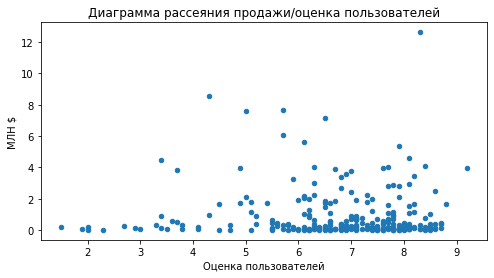

--------------- Корреляция и диаграмма рассеяния для платформы XOne ---------------


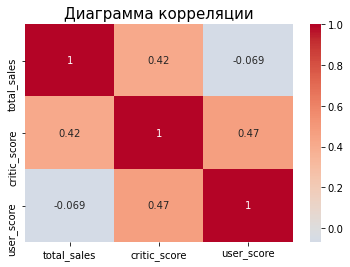

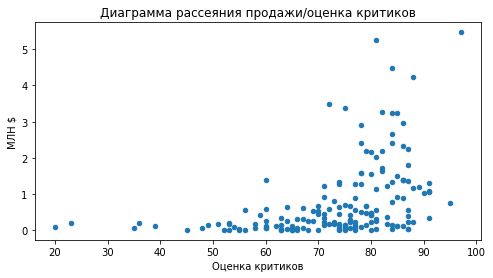

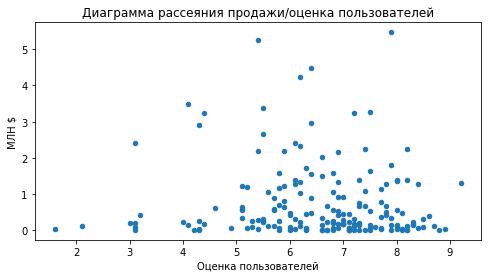

--------------- Корреляция и диаграмма рассеяния для платформы 3DS ---------------


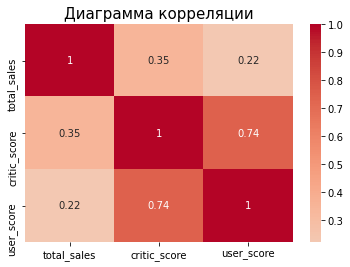

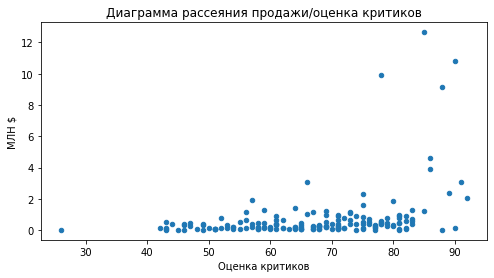

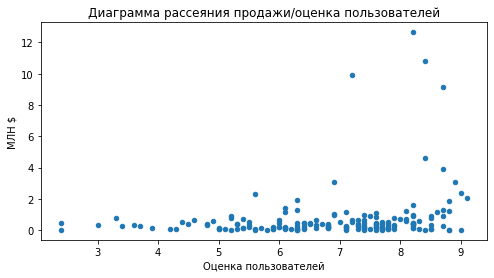

--------------- Корреляция и диаграмма рассеяния для платформы PC ---------------


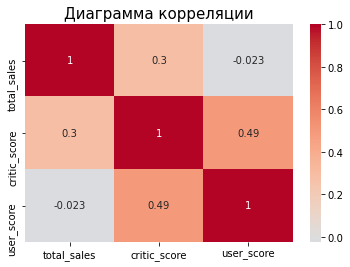

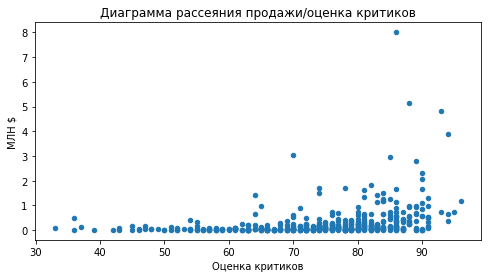

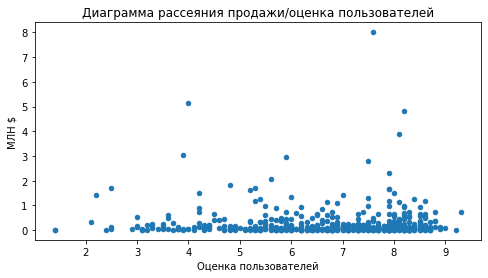

--------------- Корреляция и диаграмма рассеяния для платформы WiiU ---------------


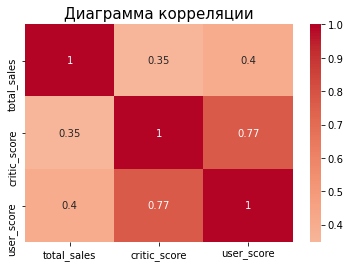

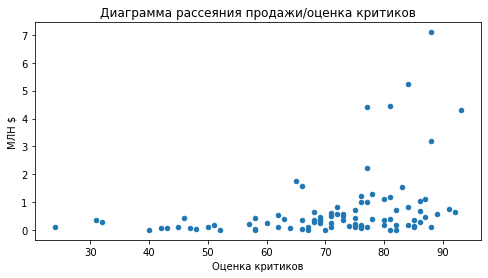

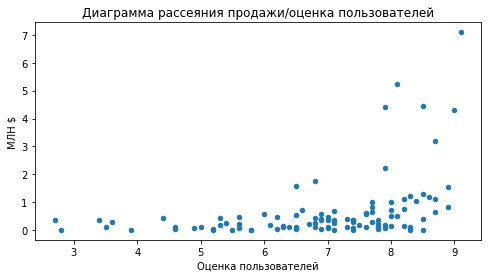

In [68]:
import seaborn as sns
for plat in top_platforms:
    
    print('-'*15, 'Корреляция и диаграмма рассеяния для платформы', plat, '-'*15)
    corr = games_actual_new[games_actual_new['platform'] == plat][['total_sales', 
                                                                  'critic_score', 'user_score']].corr()
   
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                cmap='coolwarm', center=0, annot=True)

    
    plt.title('Диаграмма корреляции', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    
    games_actual_new[games_actual_new['platform'] == plat].plot(x = 'critic_score', y='total_sales',
                     kind='scatter', figsize = (8, 4), alpha=1)
    plt.ylabel('МЛН $')
    plt.xlabel('Оценка критиков')
    plt.title('Диаграмма рассеяния продажи/оценка критиков')
    plt.show()
    
    games_actual_new[games_actual_new['platform'] == plat].plot(x = 'user_score', y='total_sales',
                     kind='scatter', figsize = (8, 4), alpha=1)
    plt.ylabel('МЛН $')
    plt.xlabel('Оценка пользователей')
    plt.title('Диаграмма рассеяния продажи/оценка пользователей')
    plt.show()

---
Рассмотрим как влияют на продажу игр для платформы PS4 отзывы пользователей и критиков:

Наблюдается умеренная положительная связь между объемом продаж и оценкой критиков. Диаграмма рассеяния подтверждает наличие такой зависимости. Чем выше оценка, тем больше игр с высоким объемом продаж. В свою очередь оценки пользователей распреелены хаотично, поэтому и коэффициент корреляции между этими отзывами и продажами очень низкий. 

---
Для других платформ выводы будут аналогичны за исключением платформы WiiU. Здесь связь между продажами и оценкой пользователей выше. Также для всех платформ характеро наличие заметной связи между оценками пользвателей и оценкой критиков.

**Рассмотрим общее распределение игр по жанрам.** 

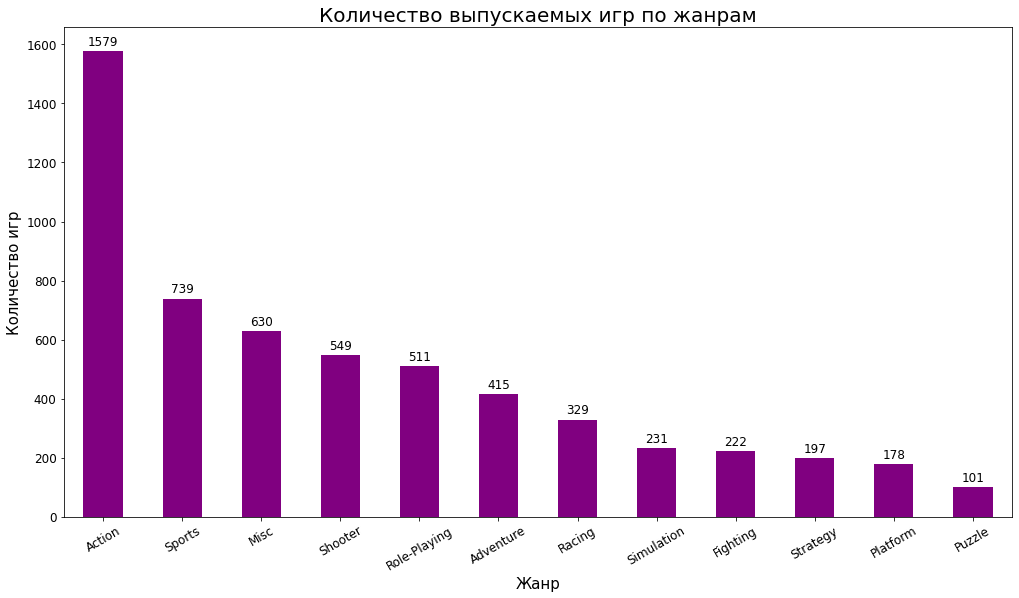

In [69]:
genre_games = games_actual_new.groupby('genre')['name'].count().sort_values(ascending = False)
genre_games.plot(kind = 'bar', figsize = (17, 9), color = 'purple', width=.5)
plt.ylabel("Количество игр", fontsize = 15)
plt.xlabel("Жанр", fontsize = 15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Количество выпускаемых игр по жанрам', fontsize=20)
for i, count in enumerate(genre_games):
    plt.text(i, count+20, count, horizontalalignment='center', fontsize = 12)

---
В наших актульных данных самые самыми популярными жанрами являются: Action, Sports, Miscellaneous, Shooter, Role-Playing.

**Теперь посмотрим как распределяется прибыль по жанрам.**

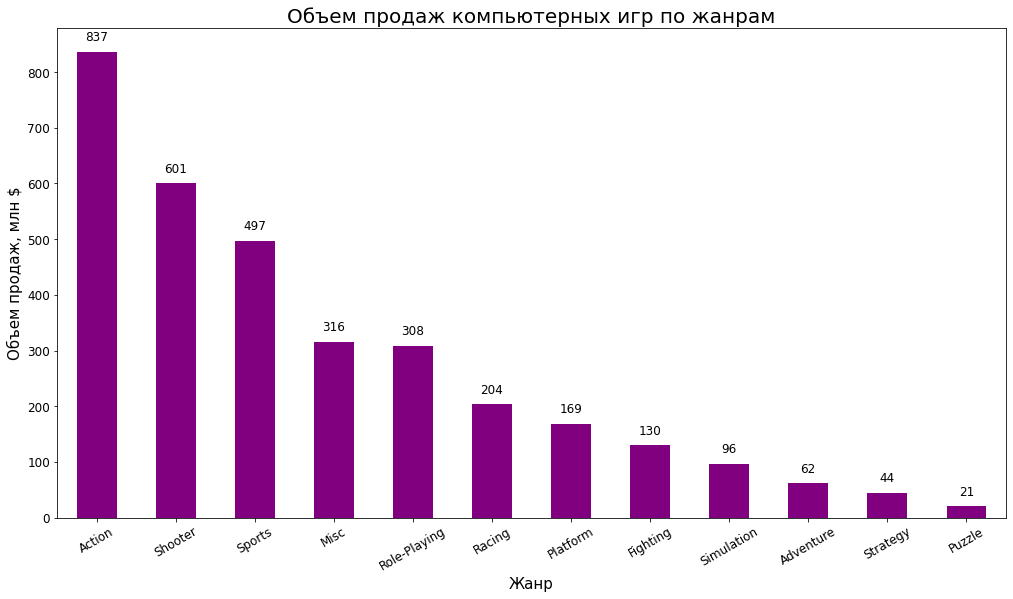

In [70]:
genre_sum = games_actual_new.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
genre_sum.plot(kind = 'bar', figsize = (17, 9), color = 'purple', width=.5)
plt.ylabel("Объем продаж, млн $", fontsize = 15)
plt.xlabel("Жанр", fontsize = 15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.title('Объем продаж компьютерных игр по жанрам', fontsize=20)
for i, count in enumerate(genre_sum):
    plt.text(i, count+20, round(count), horizontalalignment='center', fontsize = 12)

---
Самыми прибыльными жанрами являются: 
1. Action - 837 млн  
2. Shoter - 601 млн 
3. Sports - 497 млн
4. Miscellaneous - 316 млн
5. Role-Playing - 308 млн

Меньше всего продаются игры в жанрах Puzzle, Strategy и Adventure. 


### Шаг 4. Составление портрета пользователей для каждого региона
---
<a id = "Step4"></a>
[Введение](#Введение) [1](#Step1) [2](#Step2) [3](#Step3) [5](#Step5) [6](#Step6)

**Рассмотрим пользователей в разрезе регионов:**

In [71]:
regions = {'na_sales': 'North America', 
           'eu_sales': 'Europe', 
           'jp_sales': 'Japan'}

In [72]:
for reg in regions.keys():
    print('-'*15, 'Рейтинг жанров для пользователей региона', regions[reg], '-'*15)
    print()
    genre_reg = pd.DataFrame(games_actual_new.groupby('genre')[reg].sum().sort_values(ascending=False).head(5))
    genre_reg['share'] = round((genre_reg[reg] / genre_reg[reg].sum()) * 100, 2)
    print(genre_reg)
    print()



--------------- Рейтинг жанров для пользователей региона North America ---------------

              na_sales  share
genre                        
Action          383.12  30.91
Shooter         306.57  24.73
Sports          252.02  20.33
Misc            175.96  14.20
Role-Playing    121.87   9.83

--------------- Рейтинг жанров для пользователей региона Europe ---------------

         eu_sales  share
genre                   
Action     287.75  34.29
Shooter    207.80  24.76
Sports     169.52  20.20
Misc        89.57  10.67
Racing      84.52  10.07

--------------- Рейтинг жанров для пользователей региона Japan ---------------

              jp_sales  share
genre                        
Role-Playing     77.34  36.77
Action           69.86  33.22
Misc             21.58  10.26
Sports           20.97   9.97
Platform         20.56   9.78



---
В Европе и Северной Америке за период с 2008 г. по 2016 г. топ-5 самых популярных жанров компьютерных игр практически совпадает. Так, самым популярным жанром в этих регионах являеется Action. В Японии же больше всего популярны игры в жанре Role-Playing. Еще одной особенностью Японии является то, что жанр Shooter не столь популярен как в других рассматриваемых регионах.

In [73]:
for reg in regions.keys():
    print('-'*15, 'Рейтинг платформ для пользователей региона', regions[reg], '-'*15)
    print()
    platform_reg = pd.DataFrame(games_actual_new.groupby('platform')[reg].sum().sort_values(ascending=False).head(5))
    platform_reg['share'] = round((platform_reg[reg] / platform_reg[reg].sum()) * 100, 2)
    print(platform_reg)
    print()

--------------- Рейтинг платформ для пользователей региона North America ---------------

          na_sales  share
platform                 
X360        493.18  35.65
PS3         350.60  25.34
Wii         337.84  24.42
PS4         108.74   7.86
XOne         93.12   6.73

--------------- Рейтинг платформ для пользователей региона Europe ---------------

          eu_sales  share
platform                 
PS3         294.87  31.41
X360        236.22  25.16
Wii         172.76  18.40
PS4         141.09  15.03
PC           93.93  10.00

--------------- Рейтинг платформ для пользователей региона Japan ---------------

          jp_sales  share
platform                 
3DS         100.62  38.64
PS3          74.21  28.50
Wii          47.78  18.35
PSV          21.84   8.39
PS4          15.96   6.13



---
Абсолютным лидером по продажам в Северной Америке за период с 2008 г. по 2016 г. является платформа XBox360. В Европе - это платформа PlayStation3, а в Японии - Nintendo 3DS. Стоит отметить, что игры для персональных компьютеров занимают 10% рынка игр Европы. В Японии в топ-5 нет ни одной консоли фирмы XBox. 

**Рассмотрим как влияет рейтинг на продажи игр в отдельных регионах :**

--------------- Влияние рейтинга в регионе North America ---------------


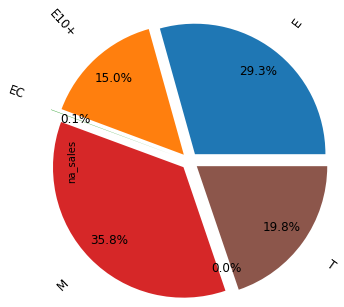

--------------- Влияние рейтинга в регионе Europe ---------------


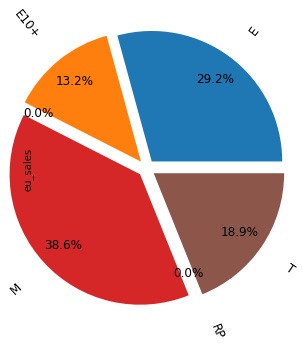

--------------- Влияние рейтинга в регионе Japan ---------------


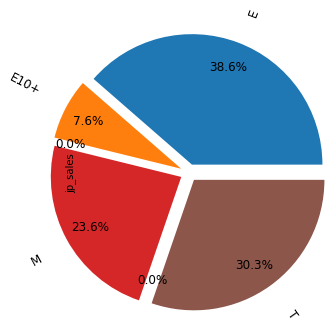

In [74]:
for reg in regions.keys():
    rating_grouped = games_actual_new.groupby('rating')[reg].sum()
    print('-'*15, 'Влияние рейтинга в регионе', regions[reg], '-'*15)
    rating_grouped.plot(autopct ='%1.1f%%',  
                        kind ='pie', 
                        explode =(0.1, 0.1, 0.2, 0.1, 0.1, 0.1), 
                        rotatelabels=True, radius = 1.5, labeldistance = 1.2, 
                        pctdistance = 0.8, fontsize = 12)
   
    plt.show()

Соотношнение проданных игр в зависимости от возрастной категории для Европы и Северной Америки практически одинаковое. Больше всего было куплено игр с рейтингом М(Для взрослых), Е(Для всех) и Т(Для подростков). 

В Японии же продажи в разрезе рейтинга ESRB выглядят следующим образом: 
1. «E» («Everyone») - 38,6 %
2. «T» («Teen») - 30,3 %
3. «M» («Mature») - 23,6 %

Таким образом можно заключить, что рейтинг ESRB влияет на продажи в разных регионах.

### Шаг 5. Проверка гипотез
---
<a id = "Step5"></a>
[1](#Step1) [2](#Step2) [3](#Step3) [4](#Step4) [6](#Step6)

#### Необходимо проверить:

1. Равны ли средние пользовательские рейтинги платформ Xbox One и PC?
2. Различаются ли средние пользовательские рейтинги жанров Action и Sports?

В обоих случаях предстоит сопоставить средние двух генеральных совокупностей, поэтому воспользуемся методом ***scipy.stats.ttest_ind()***

---
#### Вопрос № 1. Сформулируем гипотезы:

- **Нулевая гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Альтернативная гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [75]:
user_score_xbox = games_actual_new[(games_actual_new['platform'] == 'XOne')&
                                   ~(games_actual_new['user_score'].isna())]['user_score']
#user_score_xbox

In [76]:
user_score_pc = games_actual_new[(games_actual_new['platform'] == 'PC')&
                                   ~(games_actual_new['user_score'].isna())]['user_score']
#user_score_pc

In [77]:
alpha = 0.05
results = st.ttest_ind(user_score_xbox, user_score_pc)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11044340595288327
Не получилось отвергнуть нулевую гипотезу


---
Полученная вероятность выше уровня значимости. Это значит, что полученные данные не противоречат нулевой гипотезе и мы её не отвергаем. Таким образом можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые c вероятностью 11%. 

---
#### Вопрос № 2. Сформулируем гипотезы:

- **Нулевая гипотеза**: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports разные.

In [78]:
user_score_action = games_actual_new[(games_actual_new['genre'] == 'Action')&
                                   ~(games_actual_new['user_score'].isna())]['user_score']

In [79]:
user_score_sports = games_actual_new[(games_actual_new['genre'] == 'Sports')&
                                   ~(games_actual_new['user_score'].isna())]['user_score']

In [80]:
alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3455916086959434e-18
Отвергаем нулевую гипотезу


---
Полученная вероятность ниже уровня значимости. Мы отвергаем нулевую гипотезу в пользу альтернативной. Наше предположение о том, что средние пользовательские рейтинги жанров Action и Sports разные, подтвердилось.

### Шаг 6. Общий вывод
---
<a id = "Step6"></a>
[Введение](#Введение) [1](#Step1) [2](#Step2) [3](#Step3) [4](#Step4) [5](#Step5)

В рамках проекта был проведен анализ исторических данных о продажах игр полученных из открытых источников с целью выявления определяющих успешность игры закономерностей. Данные были собраны за период до 2016 года включительно. Анализ проводился с целью планирования рекламной кампании на 2017 год. 

Предварительно данные прошли предобработку, были рассчитаны дополнительные параметры. 

На основе наших данных мы узнали, что больше всего игр было выпущено в 2008 году. Тогда появилась 1441 игра для различных платформ. После этого количество новых игр постоянно снижалось.

В топ-10 самых коммерчески успешных платформ за весь рассматриваемый период вошли следующие: 

|Платформа|  Продажи, млн $ |
|--------:|   --------:     |         
|PS2 	  |   1250.92       | 
|X360 	  |   966.67        |
|PS3 	  |   935.19        |
|Wii 	  |   903.31        |
|DS 	  |   804.28        |
|PS 	  |   727.58        |
|PS4 	  |   314.14        |
|GBA 	  |   313.73        |
|PSP 	  |   293.57        |
|PC 	  |   258.86        |

Было выявлено, что у большинства игровых платформ есть определеный срок жизни, который составляет около 8 лет. Только игры на персональный компьютер показывают стабильный тренд на протяжении всего срока наблюдений. 

В ходе работы мы сократили рассматриваемый период и оставили данные с 2008 по 2016 гг. Также исключили из рассмотрения платформы, игры на которые в 2016 году уже не выпускались. Итого, для дальнейшего рассмотрения осталось 9 платформ.

В 2015-2016 годах по продажам лидировали 5 платформ: Sony PlayStation 4, Xbox One, Nintendo 3DS, PC, WiiU.
В целом на рынке игр наблюдается спад. На протяжении 8 лет рассматриваемого периода совокупные продажи игр снижаются. В разрезе платформ наблюдается точно такая же тенденция. Рост продаж показывали только новые PS4 и XOne, с 2013 по 2015 гг. 

Также было установлено, что существует умеренная прямая зависимость между объемом продаж и оценкой критиков. В свою очередь оценки пользователей для большинства платформ практически не влияют на объем продаж. 

В наших актульных данных самые самыми популярными жанрами являются: Action, Sports, Miscellaneous, Shooter, Role-Playing. За рассматриваемый период именно в этих жанрах было выпущено больше всего игр.
Эти же жанры были самыми коммерчески успешными.

Были проанализированы потребительские предпочтения для разных регионов. Установлено, что у потребителей Северной Америки и Европы практические одинаковые предпочтения как и в части игровых жанров, так и платформ. 

Рейтинг ESRB влиеяет на продажи в отдельном регионе. Так, соотношение проданных игр в разрезе возрастных категорий в Японии отличается от того, какие игры были проданы в Европе и Сверной Америке.

Была проведена проверка гипотез с помощью t-теста с уровнем значимости 5%. Гипотеза о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые была подтверждена. Такжен было установлено, что  пользовательские рейтинги жанров Action и Sports различаются. Этого говорит нам о том ,что на мнение игроков о той или иной игре большее вляние оказывает жанр нежели платформа, для которой эта игра была сделана.  

**Рекомендации по формированию рекламной кампании на 2017 год для интернет магазина "Стримчик".**

На основе проведенного анализа с учетом региональных особенностей рекомендуется следующее:
1. Включить в продажу игры для платформ ***Sony PlayStation 4, Xbox One, Nintendo 3DS, PC, WiiU***. Несмотря на плохую коньюктуру рынка, данные платформы показывают самый высокий уровень прожаж.
2. В продаже должны быть такие жанры как ***Action, Shooter, Sports, Miscellaneous и Racing***. 
3. Стоит учеть и возрастной рейтинг игр. За рассматриваемый период самыми популярными были игры с категориями **«E»** (Для всех), **«T»** (Для подростков) и **«M»** (Для взрослых).
